**ЗАДАЧА КЛАССИФИКАЦИИ ЭМОЦИЙ ПО ТЕКСТОВЫМ ДАННЫМ**

Цель: Разработка и обучение модели машинного обучения для автоматической классификации эмоций на основе текстовых данных с высокой точностью.  

**ЗАДАЧИ:**
1. Сбор и обработка датасета текстовых данных, размеченных по эмоциональным категориям.  
2. Предварительная обработка текста: очистка, токенизация, удаление стоп-слов.  
3. Разработка архитектуры модели машинного обучения для классификации эмоций (например, на основе методов глубокого обучения или традиционных подходов).  
4. Тестирование различных алгоритмов (например, Logistic Regression, SVM, LSTM) для выбора наилучшей модели.  
5. Обучение моделей и подбор гиперпараметров для достижения точности классификации свыше 80%.  
6. Оценка качества модели по метрикам: точность (accuracy), полнота (recall), F1-мера.  
7. Разработка и тестирование финальной системы классификации.  

**БЫЛИ ВЫБРАНЫ МОДЕЛИ:**
1. LogisticRegression
2. SVC
3. LSTM

- Модель LogisticRegression была выбрана **как базовая модель классификации**, может хорошо объяснить, как входные признаки, например TF-IDF влияют на принадлежность текста к определенной категории (эмоции). Также данная модель хорошо работает с **линейно разделимыми данными**. В нашем случае это можно интерпретировать так, что частота определенных слов в тексте имеют линейную связь с эмоцией: например, слова "счастье", "радость" чаще встречаются в текстах с положительными эмоциями и т.д.  
- Модель SVC: ее основной принцип - найти гиперплоскость, которая максимально разделяет классы, используя только самые важные примеры (опорные векторы) -> устойчивость к выбросам, что полезно для эмоций, где некоторые тексты значительно отличаются от большинства. Была выбрана как одна из популярных моделей машинного обучения для задач классификации. Она **обладает рядом преимуществ для анализа текстов**:
  1. текстовые данные после преобразования (TF-IDF) представляют собой высокоразмерные разряженные векторы (признаки для каждого текста), а SVC хорошо работает в таких пространствах благодаря оптимизации гиперплоскости, которая **максимально распределяет классы в многомерном пространстве**.
  2. Модель показывает высокую точность на небольших тренировочных наборах данных, т.к. модель способнатнайти оптимальную границу разделения, минимизирую обобщающую ошибку.
  3. Помимо линейных зависимостей также способна работать с нелинейными (если екстовая структура сложнее)
- Модель LSTM: это тип рекуррентной нейронной сети, который специально разработан для работы с последовательными данными, такими как текст. Эффективно решает задачи, где порядок и конекст данных играет важную роль, что делает ее подходящей для классификации эмоций.

------------------------------------------
  В ходе обучения моделей достигли следующих результатов:
  1. LogisticRegression: **accuracy - 0.845625**
    - Модель справилась с задачей классификации эмоций, показав стабильный базовый уровень точности, она хорошо работает с векторами TD-IDF, выявляя линейные зависимости между словами и эмоциями.
    - Ограничения модели в том, что она не учитывает порядок слов и сложные контексты.
    -**ИТОГО**: модель подходит для базового уровня предсказания, но ее результаты уступают более сложным моделям.
  2. SVC: **accuracy - 0.8790625**
    - Модель показала лучшие результаты, по сравнению с предыдущей. Использование линейного ядра способствовало эффективному разделению эмоций в высокоразмерном пространстве TF-IDF.
    - Преимущество SVC - нахождение оптимальной границы разделения между классами, минимизируя ошибки.
    - Однако SVC также ограничена в анализе контекста.
    -**ИТОГО**: модель хорошо подойдет, если ресурсы ограничены, **но требуется более высокая точность, чем у линейных моделей**
  3. LSTM: **accuracy - 0.9204**
    - LSTM значительно лучше предыдущих моделей: это достигается **ее способностью учитывать последовательность слов и запоминать долгосрочные зависимости в тексте**
    - Учитывает контекст, что важно для классификации эмоций.

**ВЫВОД**: исходя из проделанной работы, **LSTM является лучшим выбором** для решения задачи классификации эмоций по текстовым данным. LSTM значительно превосходит более традиционные методы (SVC, Logistic Regression) в задачах классификации эмоций.

In [1]:
import pandas as pd

# Загрузка данных
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('test.csv')
val_df = pd.read_csv('validation.csv')

# Информация о данных
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Validation shape:", val_df.shape)

# Вывод первых строк
print(train_df.head())

Train shape: (16000, 2)
Test shape: (2000, 2)
Validation shape: (2000, 2)
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


Пропуски в тренировочном наборе:
text     0
label    0
dtype: int64
Распределение классов в тренировочном наборе:
label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64


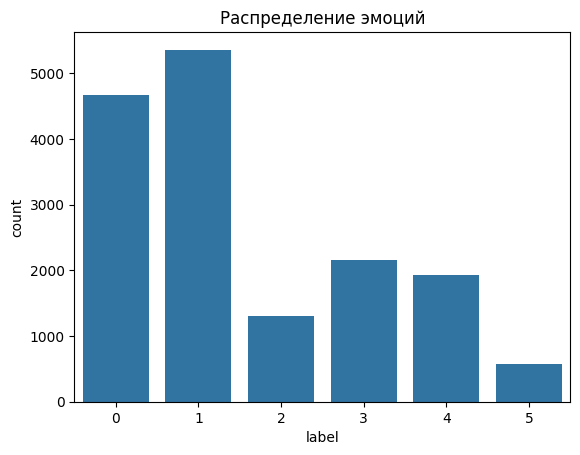

In [2]:
# Проверка пропусков
print("Пропуски в тренировочном наборе:")
print(train_df.isnull().sum())

# Распределение классов
print("Распределение классов в тренировочном наборе:")
print(train_df['label'].value_counts())

# Визуализация распределения классов
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=train_df)
plt.title("Распределение эмоций")
plt.show()

In [7]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Текстовая предобработка
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Удаление ссылок
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Удаление цифр и символов
    text = text.lower()  # Приведение к нижнему регистру
    return text

# Применение предобработки
train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

# TF-IDF векторы
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train_df['text']).toarray()

# Кодирование меток
le = LabelEncoder()
y = le.fit_transform(train_df['label'])

# Разделение данных
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Обучение модели
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Оценка модели
y_pred = lr_model.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

Accuracy: 0.845625
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       946
           1       0.79      0.96      0.87      1021
           2       0.88      0.57      0.69       296
           3       0.90      0.79      0.84       427
           4       0.85      0.71      0.77       397
           5       0.88      0.43      0.58       113

    accuracy                           0.85      3200
   macro avg       0.86      0.73      0.78      3200
weighted avg       0.85      0.85      0.84      3200



**ДЛЯ АНАЛИЗА ОШИБОК В КЛАССИФИКАЦИИ ЭМОЦИЙ ПОСТРОИМ МАТРИЦУ ОШИБОК:**

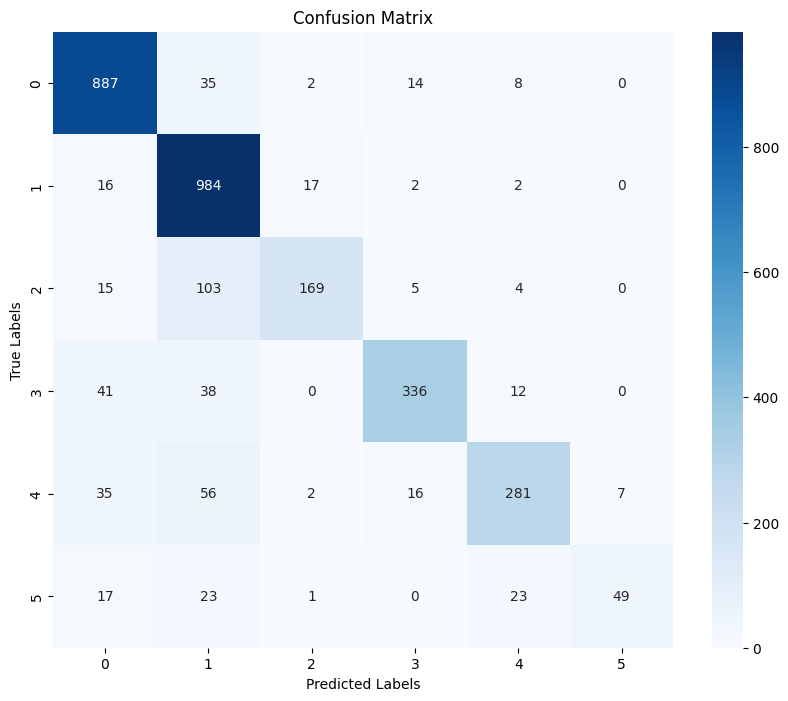

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_valid, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Видно, что количество правильно классифицированных объектов зависит от распределения классов в тренировочном наборе:
- А имеено речь идет о классах **2** и **5**
- Также видно, что чаще всего модел путала класс **2** и класс **1** (103).

Это связано с тем, что модель не способна эффективно разделить данные, если признаки классов пересекаются.

In [10]:
from sklearn.svm import SVC

# Обучение модели SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Оценка модели
y_pred_svm = svm_model.predict(X_valid)
print("Accuracy (SVM):", accuracy_score(y_valid, y_pred_svm))
print(classification_report(y_valid, y_pred_svm))

Accuracy (SVM): 0.8790625
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       946
           1       0.86      0.94      0.90      1021
           2       0.84      0.69      0.76       296
           3       0.91      0.86      0.88       427
           4       0.84      0.83      0.84       397
           5       0.82      0.65      0.72       113

    accuracy                           0.88      3200
   macro avg       0.86      0.82      0.84      3200
weighted avg       0.88      0.88      0.88      3200



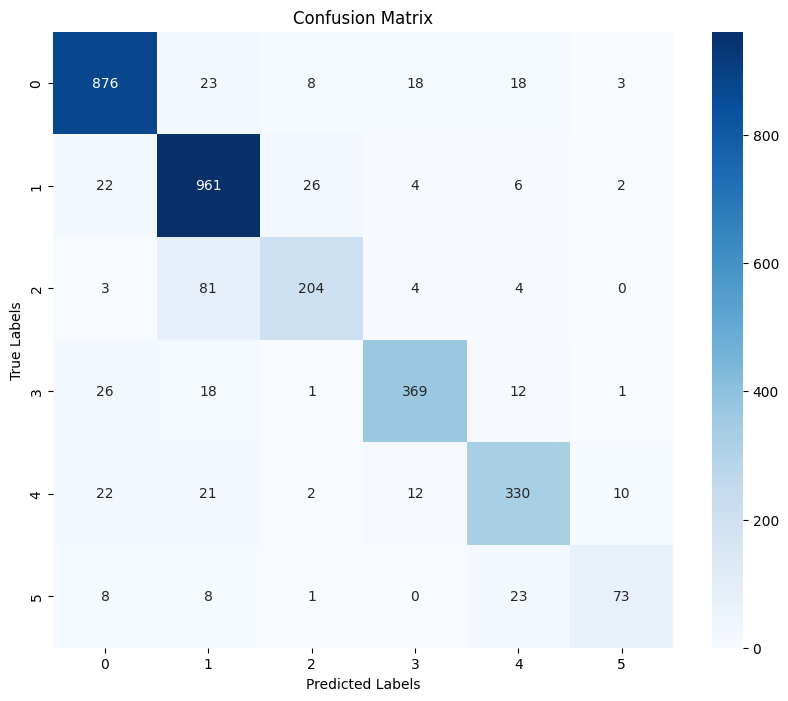

In [11]:
# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_valid, y_pred_svm)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Количество верно классифицирванных объектов по прежнему зависит от распределения в тренировочном наборе, но видно, что модель стала реже путать объекты 1 и 2 классов, так же видно, что стало больше верно классифицированных объектов в классах 2, 3, 4, 5 т.к. модель показывает высокую точность на небольших тренировочных наборах.

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Подготовка данных для LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['text'])

X_train_seq = tokenizer.texts_to_sequences(train_df['text'])
X_valid_seq = tokenizer.texts_to_sequences(test_df['text'])

X_train_seq = pad_sequences(X_train_seq, maxlen=100)
X_valid_seq = pad_sequences(X_valid_seq, maxlen=100)

# Создание модели LSTM
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(64))
model.add(Dense(6, activation='softmax'))  # 6 классов эмоций

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train_seq, y, epochs=5, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 0.4043 - loss: 1.4849 - val_accuracy: 0.8122 - val_loss: 0.5527
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.8819 - loss: 0.3613 - val_accuracy: 0.9003 - val_loss: 0.2935
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9497 - loss: 0.1542 - val_accuracy: 0.9159 - val_loss: 0.2397
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9704 - loss: 0.0873 - val_accuracy: 0.9159 - val_loss: 0.2409
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - accuracy: 0.9817 - loss: 0.0580 - val_accuracy: 0.9181 - val_loss: 0.2591


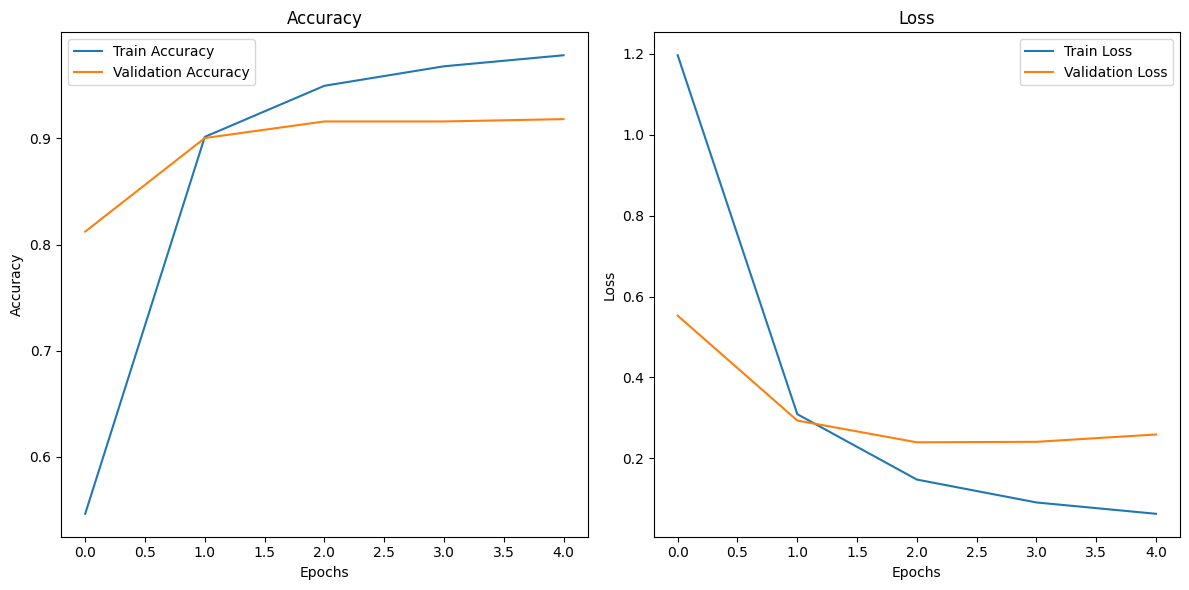

In [17]:

# Построение кривых обучения
def plot_learning_curves(history):
    # Точность
    plt.figure(figsize=(12, 6))

    # Кривая точности
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Кривая потерь
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Вызов функции для отображения кривых обучения
plot_learning_curves(history)

На основании представленных графиков обучения модели LTCM можно сделать следующие выводы:
 1. График точности (Accuracy):

  • Точность на тренировочной выборке (Train Accuracy) быстро растёт в начале и достигает высокой стабильности (около 0.98).
  • Точность на валидационной выборке (Validation Accuracy) тоже быстро увеличивается, но затем выравнивается и стабилизируется на уровне ниже тренировочной точности.
  • Разрыв между тренировочной и валидационной точностью после первых эпох указывает на возможное переобучение модели, поскольку модель показывает более высокую производительность на тренировочных данных, чем на валидационных.
 2. График функции потерь (Loss):
  
  • Потери на тренировочной выборке (Train Loss) стабильно снижаются с ростом эпох, что свидетельствует о хорошем обучении модели на тренировочных данных.
  • Потери на валидационной выборке (Validation Loss) также сначала уменьшаются, но затем начинают слегка увеличиваться, что является признаком переобучения. После 2-й эпохи модель уже не так хорошо обобщает данные на валидации.

  **ИТОГ**: видны признаки переобучения. Для предотвращения применим регуляризацию: L2 и Dropout.


In [18]:

from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Подготовка данных для LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['text'])

X_train_seq = tokenizer.texts_to_sequences(train_df['text'])
X_valid_seq = tokenizer.texts_to_sequences(test_df['text'])

X_train_seq = pad_sequences(X_train_seq, maxlen=100)
X_valid_seq = pad_sequences(X_valid_seq, maxlen=100)

# Создание модели LSTM с регуляризацией
model = Sequential()

# Слой эмбеддинга
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))

# Слой LSTM с L2 регуляризацией и Dropout
model.add(LSTM(64, kernel_regularizer=l2(0.01)))  # L2 регуляризация
model.add(Dropout(0.5))  # Dropout с вероятностью 0.5 для предотвращения переобучения

# Полносвязный слой с Softmax активацией
model.add(Dense(6, activation='softmax'))  # 6 классов эмоций

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train_seq, y, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 0.3358 - loss: 2.1038 - val_accuracy: 0.4888 - val_loss: 1.4299
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.6046 - loss: 1.1581 - val_accuracy: 0.7634 - val_loss: 0.7690
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.8045 - loss: 0.6383 - val_accuracy: 0.8403 - val_loss: 0.5487
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.8835 - loss: 0.4314 - val_accuracy: 0.8756 - val_loss: 0.4494
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - accuracy: 0.9204 - loss: 0.3389 - val_accuracy: 0.8919 - val_loss: 0.3968


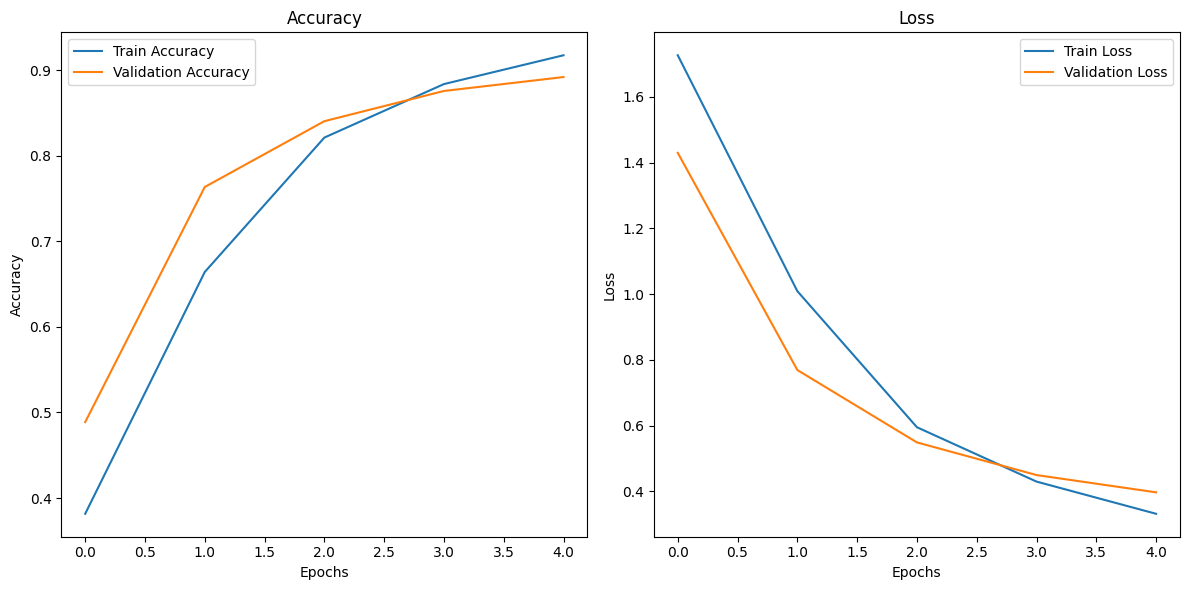

In [19]:
plot_learning_curves(history)

**ИТОГО**: После регуляризации значительно снизилось переобучение!